# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

#### Ответы
1. В какой шкале представлены все признаки в наборе?<br>
checking_status    - порядковая <br>
duration           - абсолютная<br>
credit_history     - номинальная<br> 
purpose            - номинальная<br>
credit_amount      - абсолютная<br> 
savings_status     - номинальная<br>
employment         - порядковая<br>
personal_status    - порядковая<br>
property_magnitude - номинальная<br>
age                - абсолютная<br>
housing            - номинальная<br>
existing_credits   - абсолютная<br>
job                - номинальная<br>
num_dependents     - абсолютная<br>
foreign_worker     - номинальная<br>
class              - номинальная<br>
<br>
2. Укажите признак с наименьшей дисперсией.<br>
num_dependents<br><br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
credit_amount<br><br>
4. В каком классе больше всего skilled работников?<br>
good (232)<br><br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
В credit_amount есть выбросы (гигантские кредиты), но скорее всего это особенность данных.<br>
Но забавляет самоуверенность людей, которые просят на radio/tv 10961.0 баксов...<br><br>
6. Сколько пропущенных значений в наборе?<br>
checking_status    -    194<br>
savings_status     -     88<br>
housing            -     27<br>
<br>
7. Попытайтесь заполнить пропущенные значения.<br>
credit_df.fillna('Unknown').head()<br><br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [ ]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install sklearn

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [79]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad


In [80]:
credit_df.shape

(501, 16)

In [81]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   purpose             501 non-null    object 
 4   credit_amount       501 non-null    float64
 5   savings_status      501 non-null    object 
 6   employment          501 non-null    object 
 7   personal_status     501 non-null    object 
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             474 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  foreign_worker      501 non-null    object 
 15  class               501 non-null    object 
dtypes: float

In [82]:
credit_df.describe()
#наименьшая дисперсия (std*std) у num_dependents 

,duration,credit_amount,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000
mean,20.315,3344.756,35.605,1.393,1.144
std,12.103,5154.839,11.740,0.568,0.351
min,4.000,0.000,15.000,1.000,1.000
25%,12.000,1288.000,27.000,1.000,1.000
50%,18.000,2197.000,33.000,1.000,1.000
75%,24.000,3915.000,42.000,2.000,1.000
max,60.000,100042.000,89.000,4.000,2.000


In [83]:
credit_df.groupby('class').mean()
#у credit_amount наибольная разница для классов

,duration,credit_amount,age,existing_credits,num_dependents
class,,,,,
bad,25.255,4806.358,35.029,1.380,1.153
good,18.456,2794.648,35.821,1.398,1.140


In [84]:
credit_df[credit_df['job']=='skilled'].groupby('class').job.count()
# скилловых больше в good - 232

class
bad      80
good    232
Name: job, dtype: int64

In [14]:
credit_df.checking_status.value_counts()
#checking_status - порядковая шкала
#Nan = no checking
#зачем "0" отдельно???

no checking    194
0<=X<200       142
<0             129
>=200           31
0                5
Name: checking_status, dtype: int64

In [95]:
credit_df['checking_status'] = credit_df['checking_status'].replace('no checking', np.NaN)

In [15]:
credit_df.credit_history.value_counts()
#credit_history - номинальная шкала
#non-null

existing paid                     269
critical/other existing credit    149
delayed previously                 46
no credits/all paid                21
all paid                           16
Name: credit_history, dtype: int64

In [16]:
credit_df.purpose.value_counts()
#purpose - номинальная шкала
#non-null 

radio/tv               139
new car                105
furniture/equipment     98
used car                51
not applicable          51
education               25
repairs                 12
other                    8
domestic appliance       6
retraining               6
Name: purpose, dtype: int64

In [17]:
credit_df.savings_status.value_counts()
#savings_status - порядковая шкала
#Nan = no known savings

<100                302
no known savings     88
100<=X<500           49
500<=X<1000          33
>=1000               29
Name: savings_status, dtype: int64

In [85]:
credit_df['savings_status'] = credit_df['savings_status'].replace('no known savings', np.NaN)

In [86]:
credit_df.employment.value_counts()
#employment - порядковая шкала
#non-null  

1<=X<4        174
>=7           129
4<=X<7         84
<1             80
unemployed     34
Name: employment, dtype: int64

In [87]:
credit_df.personal_status.value_counts()
#personal_status - номинальная
#non-null  

male single           275
female div/dep/mar    153
male mar/wid           48
male div/sep           25
Name: personal_status, dtype: int64

In [88]:
credit_df.property_magnitude.value_counts()
#property_magnitude - номинальная шкала
#non-null  

car                  173
real estate          147
life insurance       103
no known property     78
Name: property_magnitude, dtype: int64

In [89]:
credit_df.housing.value_counts()
#housing - номинальная шкала
#Nan = Nan

own         342
rent         82
for free     50
Name: housing, dtype: int64

In [90]:
credit_df.job.value_counts()
#personal_status - номинальная шкала
#non-null  

skilled                      312
unskilled resident            96
high qualif/self emp/mgmt     82
unemp/unskilled non res       11
Name: job, dtype: int64

In [91]:
credit_df.foreign_worker.value_counts()
#personal_status - номинальная шкала (true/false)
#non-null  

yes    479
no      22
Name: foreign_worker, dtype: int64

In [92]:
credit_df['class'].value_counts()
#class - номианльная шкала (true/false)
#non-null  

good    364
bad     137
Name: class, dtype: int64

In [93]:
credit_df.existing_credits.value_counts()
#existing_credits - абсолютная шкала
#non-null  

1.0    323
2.0    161
3.0     15
4.0      2
Name: existing_credits, dtype: int64

In [94]:
credit_df.num_dependents.value_counts()
#num_dependents - абсолютная шкала
#non-null  

1.0    429
2.0     72
Name: num_dependents, dtype: int64

In [78]:
credit_df.isnull().sum()

checking_status        194
duration                 0
credit_history           0
purpose                  0
credit_amount            0
savings_status          88
employment               0
personal_status          0
property_magnitude       0
age                      0
housing                 27
existing_credits         0
job                      0
num_dependents           0
foreign_worker           0
class                    0
credit_amount_fixed      0
dtype: int64

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

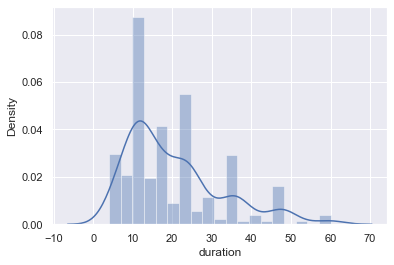

In [40]:
sns.distplot(credit_df['duration'])

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

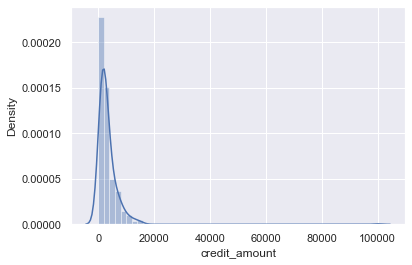

In [36]:
sns.distplot(credit_df['credit_amount'])

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

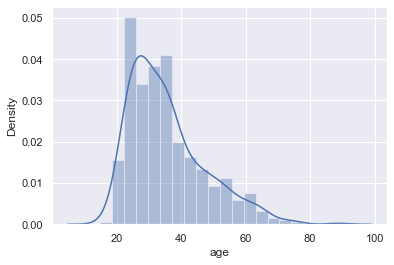

In [37]:
sns.distplot(credit_df['age']) #похоже на специфику данных

<AxesSubplot:>

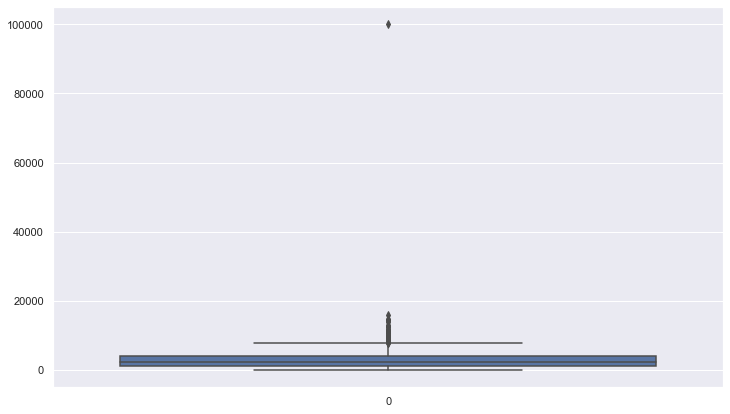

In [54]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df.credit_amount)

In [96]:
credit_df['credit_amount_fixed'] = credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95))

In [97]:
credit_df[credit_df['credit_amount']>credit_df.credit_amount.quantile(0.95)].head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class,credit_amount_fixed
18,0<=X<200,24.0,existing paid,used car,12579.0,<100,>=7,female div/dep/mar,no known property,44.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,bad,9055.0
57,NaN,36.0,critical/other existing credit,radio/tv,9566.0,<100,1<=X<4,female div/dep/mar,car,31.0,own,2.0,skilled,1.0,yes,good,9055.0
63,0<=X<200,48.0,no credits/all paid,not applicable,14421.0,<100,1<=X<4,male single,car,25.0,own,1.0,skilled,1.0,yes,bad,9055.0
78,NaN,54.0,no credits/all paid,used car,9436.0,NaN,1<=X<4,male single,life insurance,39.0,own,1.0,unskilled resident,2.0,yes,good,9055.0
87,0<=X<200,36.0,existing paid,education,12612.0,100<=X<500,1<=X<4,male single,no known property,47.0,for free,1.0,skilled,2.0,yes,bad,9055.0


<AxesSubplot:>

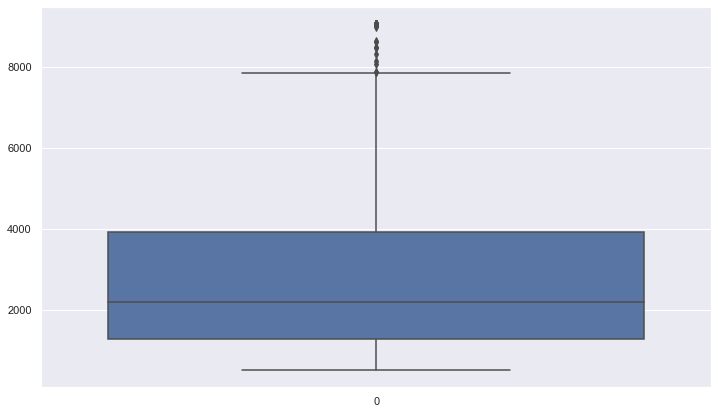

In [98]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df.credit_amount_fixed)

<AxesSubplot:>

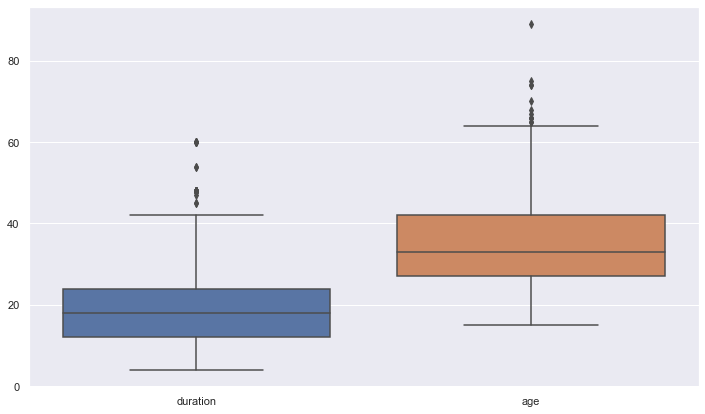

In [51]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df[['duration','age']])

In [106]:
credit_df = credit_df.fillna('Unknown')

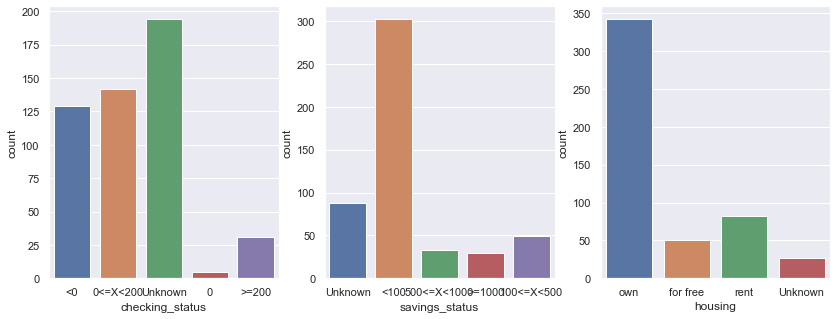

In [107]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.countplot(x='checking_status', data=credit_df, ax=axes[0]);
sns.countplot(x='savings_status', data=credit_df, ax=axes[1]);
sns.countplot(x='housing', data=credit_df, ax=axes[2]);